<a href="https://colab.research.google.com/github/baharjr/baharjr/blob/main/mixed_dentition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content.drive')


Mounted at /content.drive


In [61]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib, os

In [62]:
base_dir= pathlib.Path('/content.drive/MyDrive/mixed_data')

In [63]:
import cv2
from skimage.util import random_noise
from keras.models import load_model
from keras.preprocessing import image as pile
import PIL

import libraries

In [64]:
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
import warnings
warnings.filterwarnings('ignore')
#importing tensorflow
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import Model, Sequential

Height and widths of the dataset

In [65]:
list_of_heights = []
list_of_widths = []
dir_path = "/content.drive/MyDrive/mixed_data/train"
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # Dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

In [66]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  adult  category is  112
No of Images in  mixed  category is  106


Text(0.5, 1.0, 'heights')

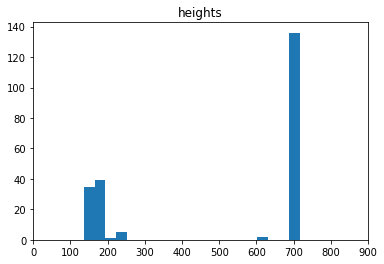

In [67]:
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0.0, 900.0)

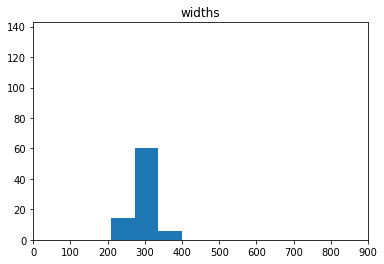

In [68]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [69]:
from tensorflow import keras
from keras import layers
cnn_base=keras.applications.vgg16.VGG16(
    weights= 'imagenet',
    include_top= False,
    input_shape= (180,180,3))
cnn_base.trainable= False
cnn_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [70]:
data_augmentation= keras.Sequential(
    [layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3)])

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
  
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

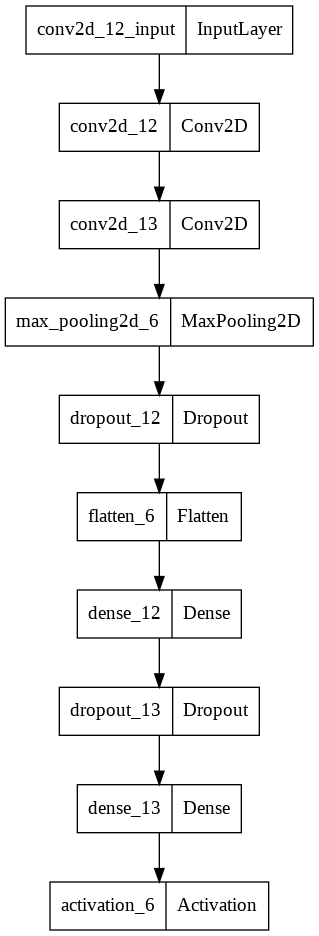

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [73]:
image_shape=(150, 150, 3)
image_gen = ImageDataGenerator(rescale=1/255)
train_image_gen=image_gen.flow_from_directory('/content.drive/MyDrive/mixed_data/train',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary')


test_image_gen=image_gen.flow_from_directory('/content.drive/MyDrive/mixed_data/test',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary',
                                             seed=123#To help Visualize the results
                                             )

Found 218 images belonging to 2 classes.
Found 223 images belonging to 2 classes.


In [74]:
history =model.fit(train_image_gen,
                   epochs=20,)

Epoch 1/20
218/218 [==============================] - 52s 225ms/step - loss: 7082.9634 - accuracy: 0.4908
Epoch 2/20
218/218 [==============================] - 47s 215ms/step - loss: 0.7122 - accuracy: 0.4771
Epoch 3/20
218/218 [==============================] - 48s 220ms/step - loss: 0.7108 - accuracy: 0.4771
Epoch 4/20
218/218 [==============================] - 45s 209ms/step - loss: 0.7040 - accuracy: 0.5046
Epoch 5/20
218/218 [==============================] - 41s 187ms/step - loss: 0.7108 - accuracy: 0.4725
Epoch 6/20
218/218 [==============================] - 42s 190ms/step - loss: 0.7157 - accuracy: 0.4450
Epoch 7/20
218/218 [==============================] - 45s 206ms/step - loss: 0.7136 - accuracy: 0.4862
Epoch 8/20
218/218 [==============================] - 52s 238ms/step - loss: 0.7048 - accuracy: 0.5138
Epoch 9/20
218/218 [==============================] - 46s 213ms/step - loss: 0.7184 - accuracy: 0.4817
Epoch 10/20
218/218 [==============================] - 49s 223ms/step 

In [75]:
model.evaluate(test_image_gen)

223/223 [==============================] - 62s 278ms/step - loss: 0.7098 - accuracy: 0.4664


[0.7098166346549988, 0.4663677215576172]

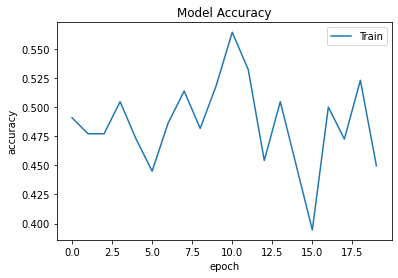

In [76]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

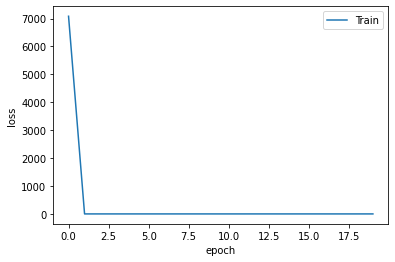

In [77]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()